# <p style=text-align:center;> FCC Sea Level Data Analysis </p>

### <p style=text-align:center;> By John Pierre </p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = pd.read_csv('epa-sea-level.csv')

df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


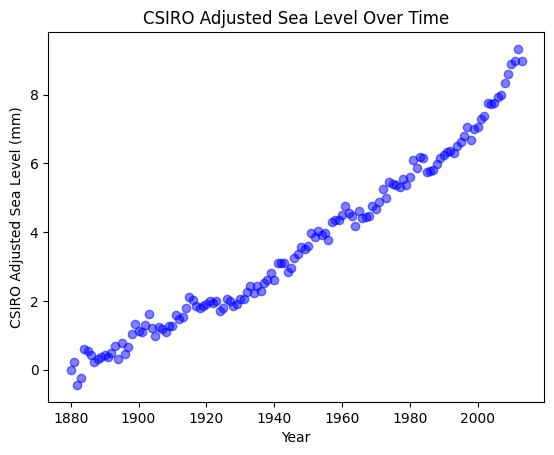

In [ ]:
# Creating a scatter plot
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', alpha=0.5)

# Labeling the axes and title
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.title('CSIRO Adjusted Sea Level Over Time')

plt.show()

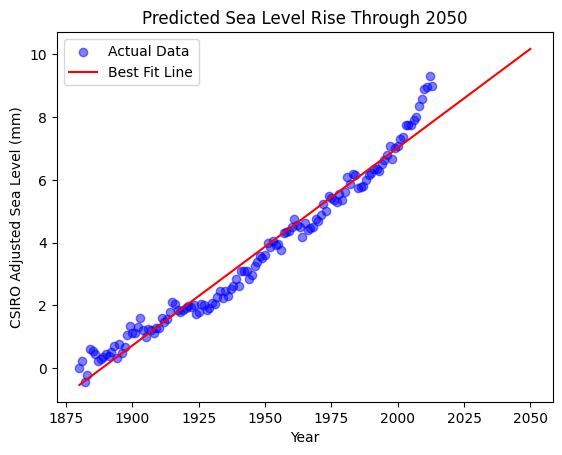

In [3]:
# Performing linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

# Generating x-values extending to 2050
years_extended = list(range(df['Year'].min(), 2051))
sea_levels_predicted = [slope * year + intercept for year in years_extended]

# Creating scatter plot
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', alpha=0.5, label='Actual Data')

# Plotting line of best fit
plt.plot(years_extended, sea_levels_predicted, color='red', label='Best Fit Line')

# Labeling axes and title
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level (mm)')
plt.title('Predicted Sea Level Rise Through 2050')

plt.legend()
plt.show()

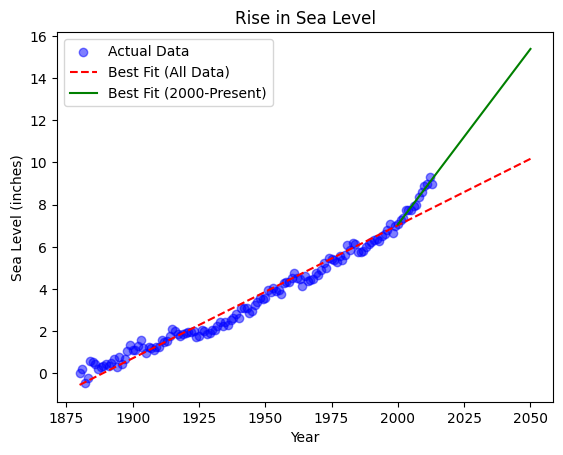

In [11]:
# Creating scatter plot
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', alpha=0.5, label='Actual Data')

# Create second line of best fit
df_recent = df[df['Year'] >= 2000].reset_index(drop=True)

years_recent = list(range(2000, 2051))
slope_recent, intercept_recent, _, _, _ = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])

sea_levels_predicted_recent = [slope_recent * year + intercept_recent for year in years_recent]
    
slope_original, intercept_original, _, _, _ = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
years_extended_original = list(range(df['Year'].min(), 2051))
sea_levels_predicted_original = [slope_original * year + intercept_original for year in years_extended_original]
    
plt.plot(years_extended_original, sea_levels_predicted_original, color='red', linestyle='dashed', label='Best Fit (All Data)')
plt.plot(years_recent, sea_levels_predicted_recent, color='green', label='Best Fit (2000-Present)')
    
# Add labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

plt.legend()
plt.show()